### 4. Comparison of performance on different data sets

In [1]:
################## IMPORT LIBRARIES ##################
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import soundfile as sf
from IPython.display import Audio, display, HTML
import torch
from os.path import join as pjoin


In [2]:
################## IMPORT MY MODULES ##################
sys.path.append('../src')

import helpers as hlp
import evaluation
import dataset as ds
import trainer
import models
import loss_mel, loss_stft, loss_waveform, loss_embedd

importlib.reload(evaluation)
importlib.reload(hlp)
importlib.reload(ds)
importlib.reload(trainer)
importlib.reload(models)
importlib.reload(loss_mel)
importlib.reload(loss_stft)
importlib.reload(loss_waveform)
importlib.reload(loss_embedd)


/home/ubuntu/Data/joanna-venvs/wave-u-net2/lib/python3.8/site-packages/pysepm/qualityMeasures.py:121: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def lpcoeff(speech_frame, model_order):
/home/ubuntu/Data/joanna-venvs/wave-u-net2/lib/python3.8/site-packages/pysepm/qualityMeasures.py:209: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def find_loc_peaks(slope,ene

<module 'loss_embedd' from '/home/ubuntu/joanna/reverb-match-cond-u-net/notebooks/../src/loss_embedd.py'>

In [3]:
# load the latest evaluation file
df_test=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/100924_compare_percept_5000testset.csv")
df_test["dataset"]="test"

display(df_test.head(10))

df_val=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/100924_compare_percept_5000valset.csv")
df_val["dataset"]="val"

display(df_val.head(10))

df_train=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-20-05-2024/100924_compare_percept_5000trainset.csv")
df_train["dataset"]="train"

display(df_train.head(10))

,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,2S_pesq,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,dataset
0,oracle,0,target:content,0.600634,0.583605,0.068631,0.066960,1.921033,0.215623,2.658916,...,1.705557,0.862720,0.798228,0.026857,0.134517,0.003540,0.138978,2.033812,16.357029,test
1,oracle,0,target:anecho,0.496922,0.483700,0.052318,0.054010,0.835397,0.140950,3.404465,...,1.965661,0.932157,2.354378,0.066631,95.583878,0.021989,0.041404,0.266058,2.118225,test
2,oracle,0,target:style,1.826192,1.820626,0.315564,0.401128,23.977242,0.921348,-35.319828,...,1.124810,0.073743,1.189633,0.792185,37.176315,0.770872,0.042380,0.245197,1.362411,test
3,oracle,0,target:targetclone,0.320246,0.319561,0.045844,0.037407,0.240898,0.077551,5.599850,...,3.054476,0.939580,0.139787,0.003636,0.164862,0.004823,0.018988,0.001153,1.468706,test
4,oracle,1,target:content,0.435575,0.426848,0.048668,0.050350,0.611915,0.122099,1.337802,...,2.229594,0.899522,0.098998,0.020601,4.335567,1.088028,0.021208,0.036832,0.367189,test
5,oracle,1,target:anecho,0.326767,0.330398,0.063273,0.064815,2.397753,0.280856,7.037162,...,1.384708,0.939650,3.160950,0.049234,89.837013,0.192396,0.068489,2.080815,13.117248,test
6,oracle,1,target:style,1.165906,1.172808,0.244962,0.320550,25.251848,0.928050,-42.988811,...,1.067087,-0.001989,0.451065,0.738025,48.619759,0.589143,0.054428,0.782898,3.587705,test
7,oracle,1,target:targetclone,0.306355,0.298369,0.039646,0.040317,0.382049,0.101352,5.511305,...,2.504774,0.931605,0.100957,0.003132,0.348965,0.188607,0.012665,0.151830,0.835573,test
8,oracle,2,target:content,0.408902,0.401244,0.045596,0.050009,3.215115,0.240023,2.854738,...,1.973909,0.893142,0.499078,0.003046,0.338451,0.042834,0.049494,1.397745,8.154717,test
9,oracle,2,target:anecho,0.286972,0.287569,0.033911,0.032148,1.018023,0.166907,6.791384,...,2.034360,0.940284,2.503214,0.058614,90.570061,0.023806,0.002303,0.141548,10.106853,test


,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,2S_pesq,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,dataset
0,oracle,0,target:content,0.600634,0.583605,0.068631,0.066960,1.921033,0.215623,2.658916,...,1.705557,0.862720,0.798228,0.026857,0.134517,0.003540,0.138978,2.033812,16.357029,val
1,oracle,0,target:anecho,0.496922,0.483700,0.052318,0.054010,0.835397,0.140950,3.404465,...,1.965661,0.932157,2.354378,0.066631,95.583878,0.021989,0.041404,0.266058,2.118225,val
2,oracle,0,target:style,1.826192,1.820626,0.315564,0.401128,23.977242,0.921348,-35.319828,...,1.124810,0.073743,1.189633,0.792185,37.176315,0.770872,0.042380,0.245197,1.362411,val
3,oracle,0,target:targetclone,0.320246,0.319561,0.045844,0.037407,0.240898,0.077551,5.599850,...,3.054476,0.939580,0.139787,0.003636,0.164862,0.004823,0.018988,0.001153,1.468706,val
4,oracle,1,target:content,0.435575,0.426848,0.048668,0.050350,0.611915,0.122099,1.337802,...,2.229594,0.899522,0.098998,0.020601,4.335567,1.088028,0.021208,0.036832,0.367189,val
5,oracle,1,target:anecho,0.326767,0.330398,0.063273,0.064815,2.397753,0.280856,7.037162,...,1.384708,0.939650,3.160950,0.049234,89.837013,0.192396,0.068489,2.080815,13.117248,val
6,oracle,1,target:style,1.165906,1.172808,0.244962,0.320550,25.251848,0.928050,-42.988811,...,1.067087,-0.001989,0.451065,0.738025,48.619759,0.589143,0.054428,0.782898,3.587705,val
7,oracle,1,target:targetclone,0.306355,0.298369,0.039646,0.040317,0.382049,0.101352,5.511305,...,2.504774,0.931605,0.100957,0.003132,0.348965,0.188607,0.012665,0.151830,0.835573,val
8,oracle,2,target:content,0.408902,0.401244,0.045596,0.050009,3.215115,0.240023,2.854738,...,1.973909,0.893142,0.499078,0.003046,0.338451,0.042834,0.049494,1.397745,8.154717,val
9,oracle,2,target:anecho,0.286972,0.287569,0.033911,0.032148,1.018023,0.166907,6.791384,...,2.034360,0.940284,2.503214,0.058614,90.570061,0.023806,0.002303,0.141548,10.106853,val


,label,idx,compared,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,...,2S_pesq,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff,dataset
0,oracle,0,target:content,0.600634,0.583605,0.068631,0.066960,1.921033,0.215623,2.658916,...,1.705557,0.862720,0.798228,0.026857,0.134517,0.003540,0.138978,2.033812,16.357029,train
1,oracle,0,target:anecho,0.496922,0.483700,0.052318,0.054010,0.835397,0.140950,3.404465,...,1.965661,0.932157,2.354378,0.066631,95.583878,0.021989,0.041404,0.266058,2.118225,train
2,oracle,0,target:style,1.826192,1.820626,0.315564,0.401128,23.977242,0.921348,-35.319828,...,1.124810,0.073743,1.189633,0.792185,37.176315,0.770872,0.042380,0.245197,1.362411,train
3,oracle,0,target:targetclone,0.320246,0.319561,0.045844,0.037407,0.240898,0.077551,5.599850,...,3.054476,0.939580,0.139787,0.003636,0.164862,0.004823,0.018988,0.001153,1.468706,train
4,oracle,1,target:content,0.435575,0.426848,0.048668,0.050350,0.611915,0.122099,1.337802,...,2.229594,0.899522,0.098998,0.020601,4.335567,1.088028,0.021208,0.036832,0.367189,train
5,oracle,1,target:anecho,0.326767,0.330398,0.063273,0.064815,2.397753,0.280856,7.037162,...,1.384708,0.939650,3.160950,0.049234,89.837013,0.192396,0.068489,2.080815,13.117248,train
6,oracle,1,target:style,1.165906,1.172808,0.244962,0.320550,25.251848,0.928050,-42.988811,...,1.067087,-0.001989,0.451065,0.738025,48.619759,0.589143,0.054428,0.782898,3.587705,train
7,oracle,1,target:targetclone,0.306355,0.298369,0.039646,0.040317,0.382049,0.101352,5.511305,...,2.504774,0.931605,0.100957,0.003132,0.348965,0.188607,0.012665,0.151830,0.835573,train
8,oracle,2,target:content,0.408902,0.401244,0.045596,0.050009,3.215115,0.240023,2.854738,...,1.973909,0.893142,0.499078,0.003046,0.338451,0.042834,0.049494,1.397745,8.154717,train
9,oracle,2,target:anecho,0.286972,0.287569,0.033911,0.032148,1.018023,0.166907,6.791384,...,2.034360,0.940284,2.503214,0.058614,90.570061,0.023806,0.002303,0.141548,10.106853,train


In [30]:

def impove_categories_tags(df): 
       # add a column to store a shorter tag identifying each category
       df['short_label'] = df['label'].apply(lambda x: x.split('_', 1)[1] if "_" in x else x)
       df['short_label'] = df['short_label'].apply(lambda x: x.replace("checkpoint","ch"))
       df['tag'] = df['short_label']+ ' -> ' + df['compared']
       df['tag'] = df['tag'].apply(lambda x: x.replace("target","tar"))
       df['tag'] = df['tag'].apply(lambda x: x.replace("prediction","pred"))
       df=df.sort_values("compared")
       df=df.drop(columns=['short_label'])
       # create a custom order of the files so that the plots have similar order as before
       custom_order=["oracle -> tar:anecho", "oracle -> tar:tarclone" , "oracle -> tar:content", "oracle -> tar:style", "anecho+fins -> pred:tar", "dfnet+fins -> pred:tar", "wpe+fins -> pred:tar",
              "c_wunet_stft+wave_0.8_0.2_chbest -> pred:tar", "c_wunet_logmel+wave_0.8_0.2_chbest -> pred:tar", "c_wunet_logmel_1_chbest -> pred:tar", "c_wunet_stft_1_chbest -> pred:tar",
              "c_wunet_stft_1_ch50 -> pred:tar", "c_wunet_stft_1_ch10 -> pred:tar", "c_wunet_stft_1_ch0 -> pred:tar"]
       df['tag'] = pd.Categorical(df['tag'], categories=custom_order, ordered=True)
       df=df.sort_values("tag")
       return df


df_test=impove_categories_tags(df_test)
df_train=impove_categories_tags(df_train)
df_val=impove_categories_tags(df_val)


In [31]:
# divide into re-reverbaration, de-reverberation 
config=hlp.load_config(pjoin("/home/ubuntu/joanna/reverb-match-cond-u-net/config/basic.yaml"))

def get_reverb_ind(config, df, split):
    config["p_noise"]=0
    config["split"]=split
    dataset=ds.DatasetReverbTransfer(config)
    indices_dry2rev=dataset.get_idx_with_rt60diff(-3,-0.5)
    indices_rev2dry=dataset.get_idx_with_rt60diff(0.5,3)
    indices_smalldiff=dataset.get_idx_with_rt60diff(-0.3,0.3)
    df.loc[df["idx"].isin(indices_dry2rev) & (df["dataset"] == config["split"]), "rev_delta"] = "dry2rev"
    df.loc[df["idx"].isin(indices_rev2dry) & (df["dataset"] == config["split"]), "rev_delta"] = "rev2dry"
    df.loc[df["idx"].isin(indices_smalldiff) & (df["dataset"] == config["split"]), "rev_delta"] = "smalldiff"
    return df 


df_test=get_reverb_ind(config, df_test, "test")
df_train=get_reverb_ind(config, df_train, "train")
df_val=get_reverb_ind(config, df_val, "val")



In [32]:


# create df with average metric across data points
num_df = df_test.select_dtypes(include='number')
df_test_g=df_test.groupby(["tag"])[num_df.columns].mean().reset_index()
num_df = df_train.select_dtypes(include='number')
df_train_g=df_train.groupby(["tag"])[num_df.columns].mean().reset_index()
num_df = df_val.select_dtypes(include='number')
df_val_g=df_val.groupby(["tag"])[num_df.columns].mean().reset_index()


display(df_val_g.head(10))
display(df_train_g.head(10))


,tag,idx,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,1L_emb_euc,...,2L_stft,2S_pesq,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff
0,oracle -> tar:anecho,2499.5,0.434848,0.432508,0.055605,0.055983,2.973709,0.237952,4.611736,27.276762,...,1.200810,1.699463,0.913099,2.893026,0.077598,92.179887,0.551046,0.072163,1.392984,10.986314
1,oracle -> tar:tarclone,2499.5,0.396548,0.392593,0.045324,0.050911,0.480580,0.107601,3.588509,17.550175,...,0.914490,2.508289,0.900487,0.095728,0.010156,1.045068,0.205312,0.023242,0.253699,2.365106
2,oracle -> tar:content,2499.5,0.468530,0.462568,0.055927,0.060503,1.764875,0.178271,1.668510,24.547914,...,1.137319,2.005051,0.871054,0.372857,0.023584,1.790625,0.447717,0.053009,0.854050,5.433590
3,oracle -> tar:style,2499.5,1.298016,1.300953,0.234503,0.284339,23.784036,0.829299,-40.488350,30.450334,...,3.284071,1.081928,0.134162,0.671089,0.667906,47.123754,0.616972,0.044404,0.470426,5.303888
4,anecho+fins -> pred:tar,2499.5,0.543012,0.539125,0.061628,0.070828,1.223584,0.176756,-0.958782,19.404649,...,1.158965,2.206065,0.870808,0.135194,0.015664,3.816971,0.456949,0.031302,0.332465,3.338251
5,dfnet+fins -> pred:tar,2499.5,0.689005,0.675933,0.076384,0.087242,2.828645,0.253457,-2.822720,20.725927,...,1.453154,1.902582,0.822922,0.222898,0.063133,6.572952,0.669870,0.065140,0.605767,6.292300
6,wpe+fins -> pred:tar,2499.5,0.657401,0.648491,0.079386,0.087859,2.621731,0.244833,-4.132763,24.360673,...,1.414501,1.686778,0.781470,0.390631,0.103863,7.223979,0.927884,0.133530,1.035955,9.854877
7,c_wunet_stft+wave_0.8_0.2_chbest -> pred:tar,2499.5,0.370693,0.364404,0.044239,0.049717,1.107380,0.141796,4.361420,18.209529,...,0.978722,2.387465,0.900508,0.192242,0.022075,2.164888,0.331657,0.037315,0.584124,4.262205
8,c_wunet_logmel+wave_0.8_0.2_chbest -> pred:tar,2499.5,0.408513,0.400394,0.047341,0.056767,1.136621,0.140242,2.536150,18.796063,...,1.036412,2.303226,0.893424,0.178617,0.022285,1.916401,0.331933,0.035212,0.554236,4.166702
9,c_wunet_logmel_1_chbest -> pred:tar,2499.5,0.415673,0.407133,0.049588,0.059106,1.186090,0.144198,2.296606,18.978201,...,1.054361,2.286964,0.891478,0.177943,0.022110,1.880168,0.331400,0.036577,0.548261,4.177760


,tag,idx,1L_multi-stft-mag,1L_stft-mag,1L_multi-wave,1L_wave,1L_logmel,1L_multi-mel,1S_sisdr,1L_emb_euc,...,2L_stft,2S_pesq,2S_stoi,3D_pesq,3D_stoi,3D_sisdr,3D_mos_nidiff,3D_pesq_nidiff,3D_stoi_nidiff,3D_sisdr_nidiff
0,oracle -> tar:anecho,2499.5,0.434848,0.432508,0.055605,0.055983,2.973709,0.237952,4.611736,27.276762,...,1.200810,1.699463,0.913099,2.893026,0.077598,92.179887,0.551046,0.072163,1.392984,10.986314
1,oracle -> tar:tarclone,2499.5,0.396548,0.392593,0.045324,0.050911,0.480580,0.107601,3.588509,17.550175,...,0.914490,2.508289,0.900487,0.095728,0.010156,1.045068,0.205312,0.023242,0.253699,2.365106
2,oracle -> tar:content,2499.5,0.468530,0.462568,0.055927,0.060503,1.764875,0.178271,1.668510,24.547914,...,1.137319,2.005051,0.871054,0.372857,0.023584,1.790625,0.447717,0.053009,0.854050,5.433590
3,oracle -> tar:style,2499.5,1.298016,1.300953,0.234503,0.284339,23.784036,0.829299,-40.488350,30.450334,...,3.284071,1.081928,0.134162,0.671089,0.667906,47.123754,0.616972,0.044404,0.470426,5.303888
4,anecho+fins -> pred:tar,2499.5,0.543012,0.539125,0.061628,0.070828,1.223584,0.176756,-0.958782,19.404649,...,1.158965,2.206065,0.870808,0.135194,0.015664,3.816971,0.456949,0.031302,0.332465,3.338251
5,dfnet+fins -> pred:tar,2499.5,0.689005,0.675933,0.076384,0.087242,2.828645,0.253457,-2.822720,20.725927,...,1.453154,1.902582,0.822922,0.222898,0.063133,6.572952,0.669870,0.065140,0.605767,6.292300
6,wpe+fins -> pred:tar,2499.5,0.657401,0.648491,0.079386,0.087859,2.621731,0.244833,-4.132763,24.360673,...,1.414501,1.686778,0.781470,0.390631,0.103863,7.223979,0.927884,0.133530,1.035955,9.854877
7,c_wunet_stft+wave_0.8_0.2_chbest -> pred:tar,2499.5,0.370693,0.364404,0.044239,0.049717,1.107380,0.141796,4.361420,18.209529,...,0.978722,2.387465,0.900508,0.192242,0.022075,2.164888,0.331657,0.037315,0.584124,4.262205
8,c_wunet_logmel+wave_0.8_0.2_chbest -> pred:tar,2499.5,0.408513,0.400394,0.047341,0.056767,1.136621,0.140242,2.536150,18.796063,...,1.036412,2.303226,0.893424,0.178617,0.022285,1.916401,0.331933,0.035212,0.554236,4.166702
9,c_wunet_logmel_1_chbest -> pred:tar,2499.5,0.415673,0.407133,0.049588,0.059106,1.186090,0.144198,2.296606,18.978201,...,1.054361,2.286964,0.891478,0.177943,0.022110,1.880168,0.331400,0.036577,0.548261,4.177760


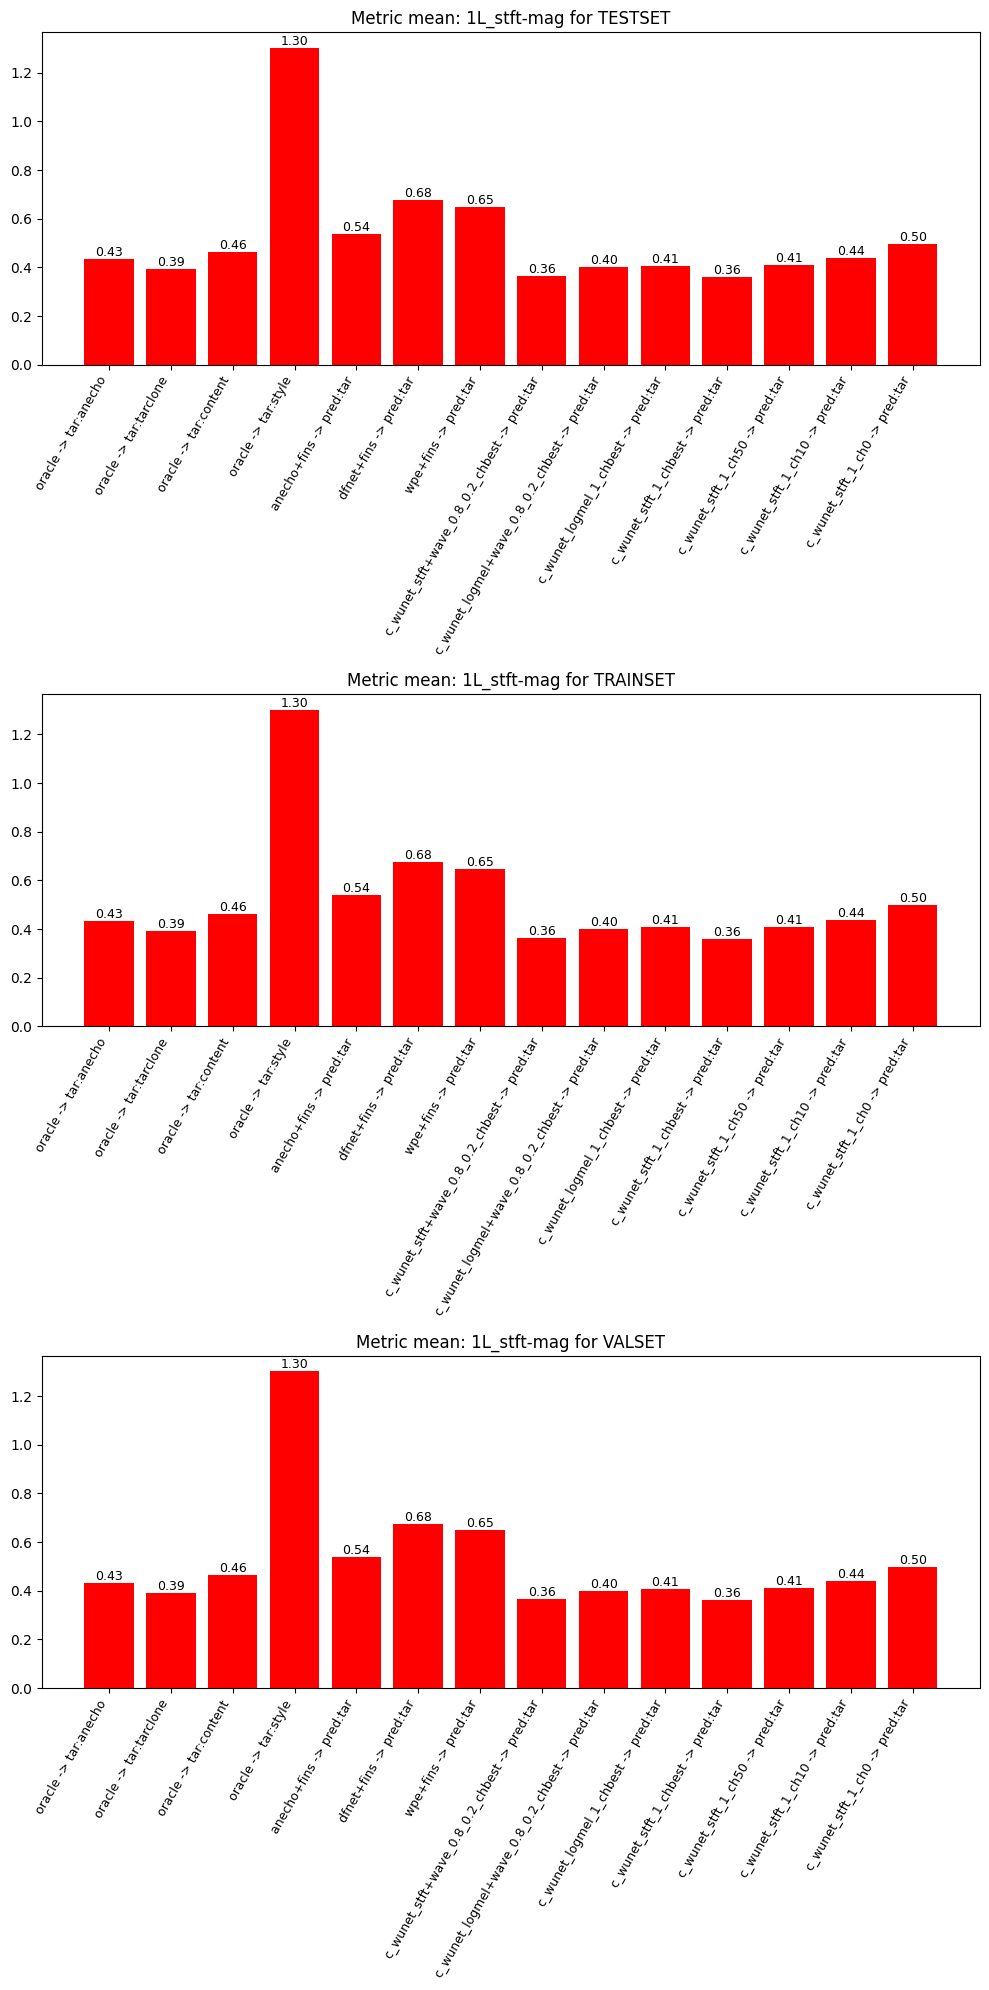

In [34]:
plt.figure(figsize=(10,20))
N_metrics=len(df_test_g.columns)
for i, column in enumerate(df_test_g.columns):
    if column == "1L_stft-mag":    
        N_rows=int(np.ceil(N_metrics/3))
        metriccolor="red" if "D_" in column or "L_" in column else "green"
        plt.subplot(3,1,1)
        bars=plt.bar(df_test_g["tag"],df_test_g[column], color=metriccolor)
        for j,bar in enumerate(bars):
            val4clone=bars[j].get_height()#metrics_df[column][metrics_df["label"]=="sTarget : sAnecho"][0]
            plt.text(j,val4clone,str("%.2f" % val4clone), horizontalalignment='center',verticalalignment='bottom', fontsize="9")
        plt.xticks(rotation=60, ha='right', fontsize="9")
        plt.title("Metric mean: " + column + " for TESTSET")
        plt.subplot(3,1,2)
        bars=plt.bar(df_train_g["tag"],df_train_g[column], color=metriccolor)
        for j,bar in enumerate(bars):
            val4clone=bars[j].get_height()#metrics_df[column][metrics_df["label"]=="sTarget : sAnecho"][0]
            plt.text(j,val4clone,str("%.2f" % val4clone), horizontalalignment='center',verticalalignment='bottom', fontsize="9")
        plt.xticks(rotation=60, ha='right', fontsize="9")
        plt.title("Metric mean: " + column + " for TRAINSET")
        plt.subplot(3,1,3)
        bars=plt.bar(df_val_g["tag"],df_val_g[column], color=metriccolor)
        for j,bar in enumerate(bars):
            val4clone=bars[j].get_height()#metrics_df[column][metrics_df["label"]=="sTarget : sAnecho"][0]
            plt.text(j,val4clone,str("%.2f" % val4clone), horizontalalignment='center',verticalalignment='bottom', fontsize="9")
        plt.xticks(rotation=60, ha='right', fontsize="9")
        plt.title("Metric mean: " + column + " for VALSET")

plt.tight_layout()
plt.show()


In [100]:
# FILTER ROWS FOR CONVENIENCE

# difference metrics use anechoic signal so they dont give reliable results when using sAnecho
# I dont want that value being taken into account in our comparison
metrics_df=metrics_df[metrics_df["tag"]!= "tar:anecho"]
metrics_df=metrics_df[metrics_df["tag"]!= "tar:style"]

row_content = metrics_df[metrics_df['tag'].str.contains("content")]
row_targetclone = metrics_df[metrics_df['tag'].str.contains("tarclone")]

row_anechofins = metrics_df[metrics_df['tag'].str.contains("anecho\\+fins")]
row_dfnetfins = metrics_df[metrics_df['tag'].str.contains("dfnet\\+fins")]
row_wpefins = metrics_df[metrics_df['tag'].str.contains("wpe\\+fins")]

rows_fins_notanecho=pd.concat([row_dfnetfins,row_wpefins])

row_ourlogmelwave = metrics_df[metrics_df['tag'].str.contains("logmel\\+wave_0.8_0.2_chbest")]
row_ourstftwave = metrics_df[metrics_df['tag'].str.contains("stft\\+wave_0.8_0.2_chbest")]
row_ourlogmel = metrics_df[metrics_df['tag'].str.contains("logmel_1_chbest")]
row_ourstft = metrics_df[metrics_df['tag'].str.contains("stft_1_chbest")]

rows_ourbests=pd.concat([row_ourlogmelwave,row_ourstftwave, row_ourlogmel,row_ourstft])

row_ourstft0 = metrics_df[metrics_df['tag'].str.contains("ch0")]
row_ourstft10 = metrics_df[metrics_df['tag'].str.contains("ch10")]
row_ourstft50 = metrics_df[metrics_df['tag'].str.contains("ch50")]

rows_ourhalftrained=pd.concat([row_ourstft0,row_ourstft10])
rows_ourmodels = metrics_df[metrics_df['tag'].str.contains("_ch")]
rows_bestpreds = pd.concat([rows_ourbests,row_anechofins])

In [101]:
# CREATE A TABLE INDICATING WHICH PERCEPTUAL OBSERVATIONS ARE CONFIRMED BY EACH METRIC

conditions_table=pd.DataFrame()
metrics_df_only = metrics_df.loc[:, ~metrics_df.columns.isin(["label","idx","compared","short_label","tag"])]
conditions_table["metric"]=metrics_df_only.columns

# sTargetClone is more similar to sTarget than sContent (change in reverb)
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (row_content[col].item() >= row_targetclone[col].item()):  
            metrics_condition.append(col)
    elif "S_" in col:
        if (row_content[col].item() <= row_targetclone[col].item()): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sTargetClone is more similar to sTarget than sContent (i.e. the metric detects correctly the difference in in reverb)"]=conditions_table["metric"].isin(metrics_condition)

# sTargetClone is most similar to sTarget from all the signals
metrics_condition=[]
for col in metrics_df.columns:
    sorted_values = metrics_df.sort_values(by=col).reset_index(drop=True)
    # loss/difference metrics
    if "L_" in col  or "D_" in col: 
        if sorted_values.loc[sorted_values.index[0], 'tag']=='oracle -> tar:tarclone':  # Check second lowest
             metrics_condition.append(col)
    # similarity metrics
    elif "S_" in col: 
        if sorted_values.loc[sorted_values.index[-1], 'tag']=='oracle -> tar:tarclone':  # Check second lowest
             metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sTargetClone is the most similar to sTarget from all signals (i.e. the metric cannot be tricked by model predictions, even though during training they learn how to mimick the original signal)"]=conditions_table["metric"].isin(metrics_condition)

# sContent less similar to target than sPred_anecho_fins and our well-trained models
# i.e. transformation helps
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (rows_bestpreds[col] < row_content[col].item()).all(): 
            metrics_condition.append(col)
    elif "S_" in col:
        if (rows_bestpreds[col] > row_content[col].item()).all(): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sContent < sPred_anecho_fins and our best models i.e. transformation helps"]=conditions_table["metric"].isin(metrics_condition)

# sPred_anecho_fins is better than all of our models
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (rows_ourmodels[col] >= row_anechofins[col].item()).all():  
            metrics_condition.append(col)
    elif "S_" in col:
        if (rows_ourmodels[col] <= row_anechofins[col].item()).all(): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sPred_anecho_fins > all our models "]=conditions_table["metric"].isin(metrics_condition)

# sPred_anecho_fins is at least better than logmel model 
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (row_ourlogmelwave[col] >= row_anechofins[col].item()).all():  
            metrics_condition.append(col)
    elif "S_" in col:
        if (row_ourlogmelwave[col] <= row_anechofins[col].item()).all(): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sPred_anecho_fins > our logmel model "]=conditions_table["metric"].isin(metrics_condition)

# sPred_anecho_fins is at least better than our half-trained models 
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (rows_ourhalftrained[col] >= row_anechofins[col].item()).all():  
            metrics_condition.append(col)
    elif "S_" in col:
        if (rows_ourhalftrained[col] <= row_anechofins[col].item()).all(): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sPred_anecho_fins > our half-trained models"]=conditions_table["metric"].isin(metrics_condition)

# sPred_anecho_fins is better than sPred_dfnet_fins and sPred_wpe_fins
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (rows_fins_notanecho[col] > row_anechofins[col].item()).all(): 
            metrics_condition.append(col)
    elif "S_" in col:
        if (rows_fins_notanecho[col] < row_anechofins[col].item()).all():  
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["sPred_anecho_fins > sPred_dfnet_fins and sPred_wpe_fins"]=conditions_table["metric"].isin(metrics_condition)


# stft+wave_0.8_0.2_checkpointbest better than logmel+wave_0.8_0.2_checkpointbest
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (row_ourlogmel[col].item() > row_ourstft[col].item()): 
            metrics_condition.append(col)
    elif "S_" in col:
        if (row_ourlogmel[col].item() < row_ourstft[col].item()):  
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["stft+wave_0.8_0.2_checkpointbest > logmel+wave_0.8_0.2_checkpointbest (i.e. metric sees the metalic ringing in the logmel signals)"]=conditions_table["metric"].isin(metrics_condition)


# checkpoint0 <  checkpoint10 < checkpoint50
metrics_condition=[]
for col in metrics_df.columns: 
    if "L_" in col  or "D_" in col:
        if (row_ourstft0[col].item() > row_ourstft10[col].item() and 
        row_ourstft10[col].item() > row_ourstft50[col].item()): 
            metrics_condition.append(col)
    elif "S_" in col:
        if (row_ourstft0[col].item() < row_ourstft10[col].item() and 
        row_ourstft10[col].item() < row_ourstft50[col].item()): 
            metrics_condition.append(col)
# print(metrics_condition)
conditions_table["earlier checkpoints < later checkpoints "]=conditions_table["metric"].isin(metrics_condition)


# # checkpoint10 <  checkpoint50
# metrics_condition=[]
# for col in metrics_df.columns: 
#     if "L_" in col  or "D_" in col:
#         if row_ourstft10[col].item() > row_ourstft50[col].item(): 
#             metrics_condition.append(col)
#     elif "S_" in col:
#         if row_ourstft10[col].item() < row_ourstft50[col].item(): 
#             metrics_condition.append(col)
# print(metrics_condition)
# conditions_table["checkpoint10  < checkpoint50 "]=conditions_table["metric"].isin(metrics_condition)

# # checkpoint50 <  checkpointbest
# metrics_condition=[]
# for col in metrics_df.columns: 
#     if "L_" in col  or "D_" in col:
#         if row_ourstft50[col].item() > row_ourstft[col].item(): 
#             metrics_condition.append(col)
#     elif "S_" in col:
#         if row_ourstft50[col].item() < row_ourstft[col].item(): 
#             metrics_condition.append(col)
# print(metrics_condition)
# conditions_table["checkpoint50  < checkpointbest "]=conditions_table["metric"].isin(metrics_condition)


# # checkpoint0 <  checkpoint10
# metrics_condition=[]
# for col in metrics_df.columns: 
#     if "L_" in col  or "D_" in col:
#         if row_ourstft0[col].item() > row_ourstft10[col].item(): 
#             metrics_condition.append(col)
#     elif "S_" in col:
#         if row_ourstft0[col].item() < row_ourstft10[col].item(): 
#             metrics_condition.append(col)
# print(metrics_condition)
# conditions_table["checkpoint0  < checkpoint10 "]=conditions_table["metric"].isin(metrics_condition)

# Define a function to apply colors
def highlight_bool(val):
    if val==True:
        color = 'mintcream'  
    elif val==False:
        color='seashell'
    else:
        color='white'
    return f'background-color: {color}'

# Apply the styling to the entire DataFrame
conditions_table = conditions_table.style.applymap(highlight_bool)
display(conditions_table)

,metric,sTargetClone is more similar to sTarget than sContent (i.e. the metric detects correctly the difference in in reverb),"sTargetClone is the most similar to sTarget from all signals (i.e. the metric cannot be tricked by model predictions, even though during training they learn how to mimick the original signal)",sContent < sPred_anecho_fins and our best models i.e. transformation helps,sPred_anecho_fins > all our models,sPred_anecho_fins > our logmel model,sPred_anecho_fins > our half-trained models,sPred_anecho_fins > sPred_dfnet_fins and sPred_wpe_fins,stft+wave_0.8_0.2_checkpointbest > logmel+wave_0.8_0.2_checkpointbest (i.e. metric sees the metalic ringing in the logmel signals),earlier checkpoints < later checkpoints
0,1L_multi-stft-mag,True,False,True,False,False,False,True,True,True
1,1L_stft-mag,True,False,True,False,False,False,True,True,True
2,1L_multi-wave,True,True,True,False,False,True,True,True,True
3,1L_wave,True,True,True,False,False,False,True,True,True
4,1L_logmel,True,True,True,True,True,True,True,False,True
5,1L_multi-mel,True,True,True,True,True,True,True,False,True
6,1S_sisdr,True,False,False,False,False,False,True,True,True
7,1L_emb_euc,True,True,True,False,True,True,True,True,True
8,2L_lsd,True,True,True,True,True,True,True,True,True
9,2L_mcd,True,True,True,False,False,True,True,True,True
